In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # Test for Gaussian
from scipy.stats import levene # Test for variance
from scipy.stats import kruskal  # If ANOVA assumptions don't hold will use this

In [54]:
df = pd.read_csv('data.csv')

In [55]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Exploratory Data Analysis

In [5]:
df.shape

(10886, 12)

#### Observation

- data contains 10886 rows and 12 columns (Features)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### Observation

- All features(columns) are numerical except datetime which is object

In [7]:
df.info() # which gives basic information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Observations

- Indexing starts from 0 to 10885
- There are 12 features
- All features (columns) are numerical except datetime
- There is no missing/null values

In [8]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Observation

- No missing value / Null values

In [9]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [10]:
df['datetime'].min()

'2011-01-01 00:00:00'

In [11]:
df['datetime'].max()

'2012-12-19 23:00:00'

In [12]:
df['time'] = pd.to_datetime(df['datetime']).dt.time

In [13]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00


#### Observation

- We have data ranging from 2011-01-01 00:00:00 to 2012-12-19 23:00:00
- We have a data for every hour
- We have the data with temp ranging from 0.82 and 41
- We have the data with humidity ranging from 0 and 100
- We have the data with windspeed ranging from 0 and 56.99
- We have the data with count (count of total rental bikes including both casual and registered) ranging from 1 to 977 and median is 145

In [14]:
df['time'].value_counts()

13:00:00    456
23:00:00    456
19:00:00    456
18:00:00    456
21:00:00    456
17:00:00    456
12:00:00    456
14:00:00    456
16:00:00    456
20:00:00    456
22:00:00    456
15:00:00    456
10:00:00    455
00:00:00    455
08:00:00    455
11:00:00    455
06:00:00    455
09:00:00    455
07:00:00    455
01:00:00    454
05:00:00    452
02:00:00    448
04:00:00    442
03:00:00    433
Name: time, dtype: int64

#### Observation

- In day, Almost every hour same total no. of rentals happened.

In [15]:
df['season'].unique()

array([1, 2, 3, 4])

#### Observation

We have 4 unique values for season feature (columns)
- 1 represents spring
- 2 represents summer
- 3 represents fall
- 4 represents winter

In [16]:
df['holiday'].unique()

array([0, 1])

#### Observation

We have 2 unique values for holiday feature (columns)
- 0 represents not holiday
- 1 represents holiday

In [17]:
df['workingday'].unique()

array([0, 1])

#### Observation

We have 2 unique values for workingday feature (columns)
- 0 represents not working day
- 1 represents working day

In [18]:
df['weather'].unique()

array([1, 2, 3, 4])

#### Observation

We have 4 unique values for weather feature (columns)
- 1 represents Clear, Few clouds, partly cloudy, partly cloudy
- 2 represents Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 represents Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 represents Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
df.groupby('season')["count"].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

#### Observation

- As per data, Most of the rental bikes including both casual and registered in season fall

In [20]:
df.groupby('holiday')["count"].sum()

holiday
0    2027668
1      57808
Name: count, dtype: int64

#### Observation

- As per data, Most of the rental bikes including both casual and registered in non holiday days

In [21]:
df.groupby('workingday')["count"].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

#### Observation

- As per data, Most of the rental bikes including both casual and registered in working day.

In [22]:
df['casual'].mean()

36.02195480433584

In [23]:
df['registered'].mean()

155.5521771082124

In [24]:
df['casual'].median()

17.0

In [25]:
df['registered'].median()

118.0

#### Observation

- Most of the rentals registered with registered people into the system

### Univariate Analysis

In [26]:
df['count'].min()

1

In [27]:
df['count'].max()

977

In [28]:
bins = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

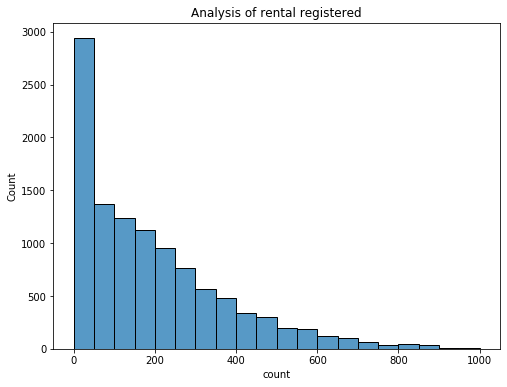

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="count", bins=bins)
plt.xticks(fontsize=10)
plt.title("Analysis of rental registered")
plt.show()

#### Observation

- Most of the times Maximum rental registered in an hour happend in between 0 to 50

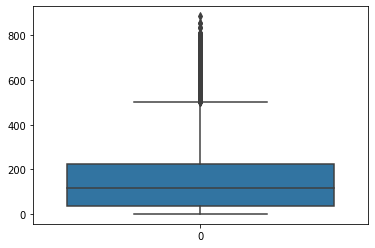

In [30]:
sns.boxplot(df['registered'])
plt.show()

#### Observation

- Median of rental registered in registered people happend in hour is 118
- There are some outliers existed(higher rental registered happend but rarely)

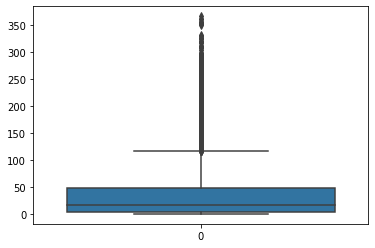

In [31]:
sns.boxplot(df['casual'])
plt.show()

#### Observation

- Median of rental casual in registered people happend in hour is 17
- There are some outliers existed(higher rental registered happend but rarely)

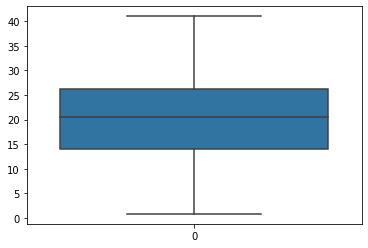

In [32]:
sns.boxplot(df['temp'])
plt.show()

#### Observation

- Median temperature is 20.5

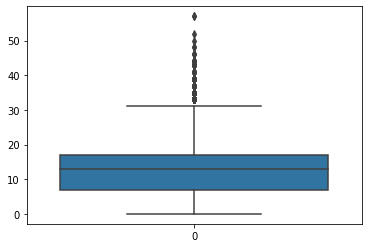

In [33]:
sns.boxplot(df['windspeed'])
plt.show()

#### Observation

- Median windspeed is 12.998
- There are some outliers exists in data

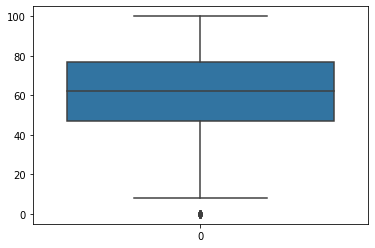

In [34]:
sns.boxplot(df['humidity'])
plt.show()

#### Observation:

- Median humidity is 62
- outliers exists in data

### Bi Variate Analysis

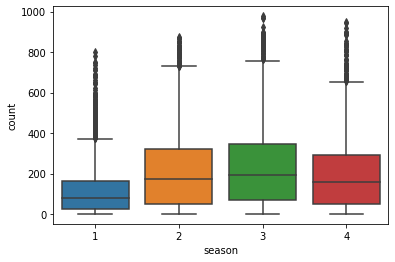

In [35]:
sns.boxplot(data=df, x='season', y='count')
plt.show()

#### Observation:

- In fall season, Highest median rentals registered
- In spring season, lowest median rentals registered
- There are some outliers exists in each season's data

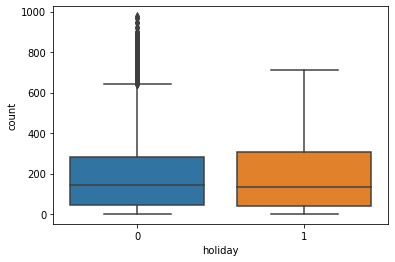

In [36]:
sns.boxplot(data=df, x='holiday', y='count')
plt.show()

#### Observation

- Median of rental registered in both holiday and non-holiday days are almost similar
- There are some outliers exists in non holiday rental registered data

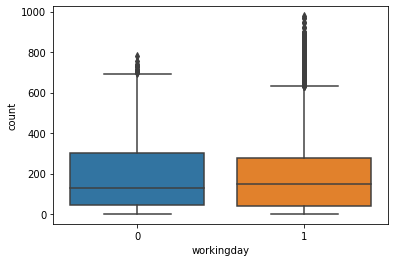

In [37]:
sns.boxplot(data=df, x='workingday', y='count')
plt.show()

#### Observation:

- Median of rental registered in working day is 151 and non working day is 128.
- There are some outliers exists in data

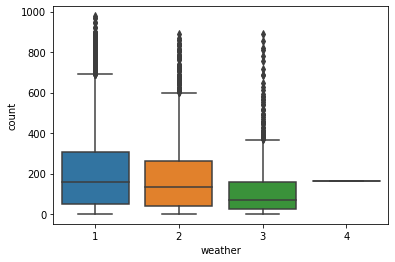

In [38]:
sns.boxplot(data=df, x='weather', y='count')
plt.show()

#### Observation:

- Maximum median of rental registered in weather condition Clear, Few clouds, partly cloudy, partly cloudy.
- Only one data point for weather Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- There are some outliers exists in data

## Hypothesis Testing

In [39]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00


In [40]:
df.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

#### Observation

- Mean of count (count of total rental bikes including both casual and registered) is slightly different for working day and non working day. We can use 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

#### 2- Sample T-Test

- mu1 = 188.50 (Mean of non working day count)
- mu2 = 193.01 (Mean of working day count)
- H0 (Null Hypothesis): Working Day has no effect on the number of electric cycles rented (mu1 = mu2 Mean value of both is same)
- H1 (Alternate Hypothesis): Working Day has an effect on the number of electric cycles rented (mu1 < mu2 Mean value of both is not same)

In [41]:
non_workingday_data = df.loc[df['workingday'] == 0]['count']
workingday_data = df.loc[df['workingday'] == 1]['count']

In [42]:
# H0 (Null Hypothesis): Working Day has no effect on the number of electric cycles rented (mu1 = mu2 Mean value of both is same)
# H1 (Alternate Hypothesis): Working Day has an effect on the number of electric cycles rented (mu1 < mu2 Mean value of both is not same)

alpha = 0.05 #(5% significance)

t_stats, p_value = ttest_ind(non_workingday_data, workingday_data, alternative='less')
print(t_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Working Day has an effect on the number of electric cycles rented')
else:
  print('Do not reject H0')
  print('Working Day has no effect on the number of electric cycles rented')

-1.2096277376026694
0.11322402113180674
Do not reject H0
Working Day has no effect on the number of electric cycles rented


#### Observation

- p_value is greater than alpha (significant level). So Do not reject Null Hypothesis. Working Day has no effect on the number of electric cycles rented
- t statistics is Negative (-1.2). A negative t-statistic means that it lies to the left of the mean

In [45]:
df.groupby('holiday')['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

#### Observation

- Mean of count (count of total rental bikes including both casual and registered) is slightly different for holiday day and non holiday. We can use 2- Sample T-Test to check if holiday has an effect on the number of electric cycles rented

#### 2- Sample T-Test

- mu1 = 191.74 (Mean of non working day count)
- mu2 = 185.87 (Mean of working day count)
- H0 (Null Hypothesis): holiday has no effect on the number of electric cycles rented (mu1 = mu2 Mean value of both is same)
- H1 (Alternate Hypothesis): holiday has an effect on the number of electric cycles rented (mu1 > mu2 Mean value of both is not same

In [47]:
non_holiday_data = df.loc[df['holiday'] == 0]['count']
holiday_data = df.loc[df['holiday'] == 1]['count']

In [48]:
# H0 (Null Hypothesis): holiday has no effect on the number of electric cycles rented (mu1 = mu2 Mean value of both is same)
# H1 (Alternate Hypothesis): holiday has an effect on the number of electric cycles rented (mu1 > mu2 Mean value of both is not same)
alpha = 0.05 #(5% significance)

t_stats, p_value = ttest_ind(non_holiday_data, holiday_data, alternative='greater')
print(t_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Holiday has an effect on the number of electric cycles rented')
else:
  print('Do not reject H0')
  print('Holiday has no effect on the number of electric cycles rented')

0.5626388963477119
0.28684619416355517
Do not reject H0
Holiday has no effect on the number of electric cycles rented


#### Observation

- p_value is greater than alpha (significant level). So Do not reject Null Hypothesis. Holiday has no effect on the number of electric cycles rented
- t statistics is positive (0.56). A Positive t-statistic means that it lies to the right of the mean

### Checking Weather is dependent on the season

In [50]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00


In [51]:
weather_season = pd.crosstab(index=df['weather'], columns = df['season'])

weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


#### Chi-square test to check if Weather is dependent on the season

- H0 (Null Hypothesis): Weather and Season features are independent
- Ha (Alternate Hypothesis): Weather and Season features are dependent

In [52]:
# H0 : Weather and Season are independent
# Ha : Weather and Season are dependent

alpha = 0.05

chistats, p_value, df, exp_val = chi2_contingency(weather_season)

print(chistats)
print(p_value)
print(df)
print(exp_val)
if p_value < alpha:
  print('reject H0')
  print('Weather and Season are dependent')
else:
  print('Do not reject H0')
  print('Weather and Season are independent')

49.15865559689363
1.5499250736864862e-07
9
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
reject H0
Weather and Season are dependent


#### Observation

- p_value is less than alpha (significant level). so Rejecting the Null hypothesis
- Using chi-square test statistically Weather and Season are dependent
- chi stats value is positive. ( chi2 test always right tailed test)

### ANOVA / Kruskal test to Check if No. of cycles rented is similar or different in different 1. weather 2. season

#### Checking if No. of cycles rented is similar or different in different Seasons

In [56]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [57]:
season_spring = df.loc[df['season'] == 1]['count']
season_summer = df.loc[df['season'] == 2]['count']
season_fall = df.loc[df['season'] == 3]['count']
season_winter = df.loc[df['season'] == 4]['count']

In [58]:
season_spring.mean()

116.34326135517499

In [59]:
season_summer.mean()

215.25137211855105

In [60]:
season_fall.mean()

234.417124039517

In [61]:
season_winter.mean()

198.98829553767374

- Numerical vs Categorical (we have 4 categories in season)
- We have to use ANOVA test to test, is there any statistically different in means of different season

### Assumptions of ANOVA

- Data should be Gaussion (To test this condition we need to use QQ Plot or Shapiro test)
- Data should be independent (One row shouldn't dependent on other)
- Equal variance in each group.

#### QQplot

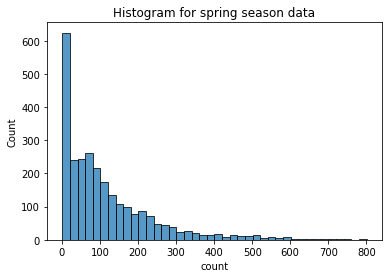

In [63]:
sns.histplot(season_spring)
plt.title('Histogram for spring season data')
plt.show()

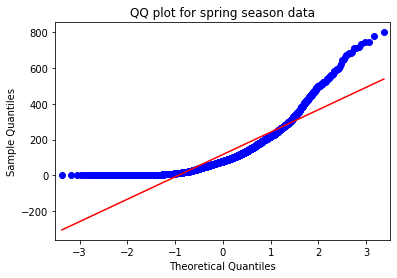

In [64]:
qqplot(season_spring, line="s")
plt.title('QQ plot for spring season data')
plt.show()

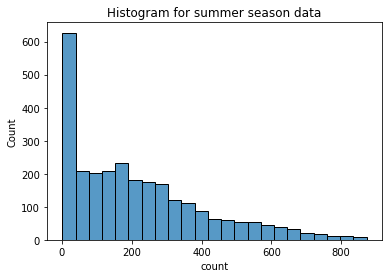

In [65]:
sns.histplot(season_summer)
plt.title('Histogram for summer season data')
plt.show()

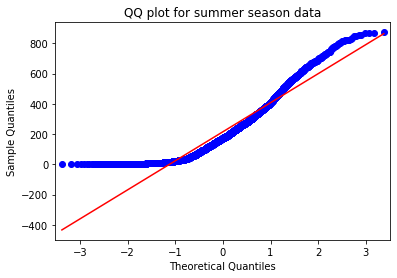

In [66]:
qqplot(season_summer, line="s")
plt.title('QQ plot for summer season data')
plt.show()

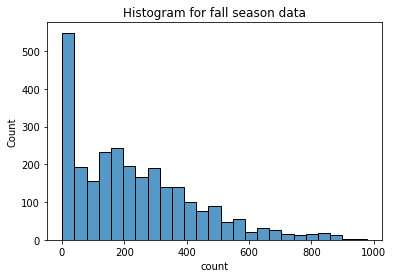

In [67]:
sns.histplot(season_fall)
plt.title('Histogram for fall season data')
plt.show()

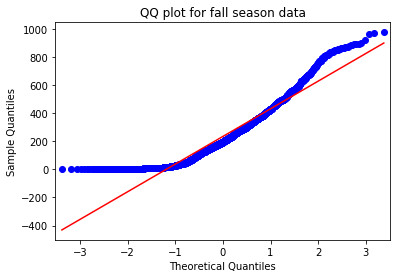

In [68]:
qqplot(season_fall, line="s")
plt.title('QQ plot for fall season data')
plt.show()

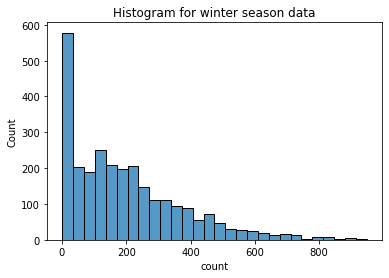

In [69]:
sns.histplot(season_winter)
plt.title('Histogram for winter season data')
plt.show()

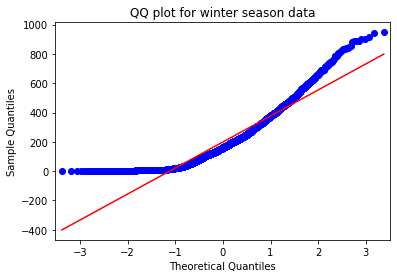

In [70]:
qqplot(season_winter, line="s")
plt.title('QQ plot for winter season data')
plt.show()

#### Observation:

- QQ plot proves that all seasons data not following normal distribution.

#### Shapiro test to check wether data follows Normal distribution or not

In [72]:
len(season_spring)

2686

In [73]:
season_spring_subset = season_spring.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis): Data is Gaussian
- Ha (Alternate Hypothesis): Data is not Gaussian

In [75]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05 # significant level
test_stats, p_value = shapiro(season_spring_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.802936851978302
3.0504476722370555e-10
reject H0
Data is not Gaussian


#### Observation:

- p_value is less than alpha, so we are rejecting Null Hypothesis. it means data is not gaussian

In [76]:
season_summer_subset = season_summer.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis): Data is Gaussian
- Ha (Alternate Hypothesis): Data is not Gaussian

In [77]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05 # significant level
test_stats, p_value = shapiro(season_summer_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.9280700087547302
3.874092726618983e-05
reject H0
Data is not Gaussian


#### Observation:

- p_value is less than alpha, so we are rejecting Null Hypothesis. it means data is not gaussian

In [78]:
season_fall_subset = season_fall.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis): Data is Gaussian
- Ha (Alternate Hypothesis): Data is not Gaussian

In [79]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05 #significant leve
test_stats, p_value = shapiro(season_fall_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.894763171672821
8.085488616416114e-07
reject H0
Data is not Gaussian


#### Observation:

- p_value is less than alpha, so we are rejecting Null Hypothesis. it means data is not gaussian

In [80]:
season_winter_subset = season_winter.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis): Data is Gaussian
- Ha (Alternate Hypothesis): Data is not Gaussian

In [81]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05 # significance level
test_stats, p_value = shapiro(season_winter_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.886364221572876
3.408069915167289e-07
reject H0
Data is not Gaussian


#### Observation

- p_value is less than alpha, so we are rejecting Null Hypothesis. it means data is not gaussian

### Conclusion:

- Both QQplot and Shapiro test proved that season_winter, season_summer, season_fall, season_spring not following normal(gaussian) distribution.

### Checking variance in each group is equal or not using LEVENE test

In [82]:
# H0: variances are equal
# H1: variances are not equal

alpha = 0.05 #significance

statistic, p_value = levene(season_spring,season_summer, season_winter, season_fall)
print(statistic)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('variances are not equal')
else:
  print('Do not reject H0')
  print('variances are equal')

187.7706624026276
1.0147116860043298e-118
reject H0
variances are not equal


#### Observation:

- p_value is less than alpha, so rejecting null hypothesis, Variances of each group are not equal
- If assumptions of ANOVA fails, We can use kruskal test to Check if No. of cycles rented is similar or different in different seasons

### Kruskal test

- H0 (Null Hypothesis): No. of cycles rented is similar in all season
- H1 (Alternate Hypothesis) : No. of cycles rented is different in all season

In [83]:
# H0: No. of cycles rented is similar in all season
# H1: No. of cycles rented is different in all season
alpha = 0.05 # significance
statistic, p_value = kruskal(season_spring,season_summer, season_winter, season_fall)
print(statistic)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('No. of cycles rented is different in all season')
else:
  print('Do not reject H0')
  print('No. of cycles rented is similar in all season')

699.6668548181988
2.479008372608633e-151
reject H0
No. of cycles rented is different in all season


### Conclusion:

- p_value is less than alpha so rejecting null hypothesis.
- No. of cycles rented is different in all season.

### Checking for weather

In [84]:
df['weather'].unique()

array([1, 2, 3, 4])

In [85]:
weather_clear = df.loc[df['weather'] == 1]['count']
weather_mist = df.loc[df['weather'] == 2]['count']
weather_lightsnow = df.loc[df['weather'] == 3]['count']
weather_heavyrain = df.loc[df['weather'] == 4]['count']

In [86]:
weather_clear.mean()

205.23679087875416

In [87]:
weather_mist.mean()

178.95553987297106

In [88]:
weather_lightsnow.mean()

118.84633294528521

In [89]:
weather_heavyrain.mean()

164.0

- Numerical vs Categorical (we have 4 categories in weather)
- We have to use ANOVA test to test, is there any statistically different in means of different weather

### Assumptions of ANOVA

- Data should be Gaussion (To test this condition we need to use QQ Plot or Shapiro test)
- Data should be independent (One row shouldn't dependent on other)
- Equal variance in each group.

### QQPlot

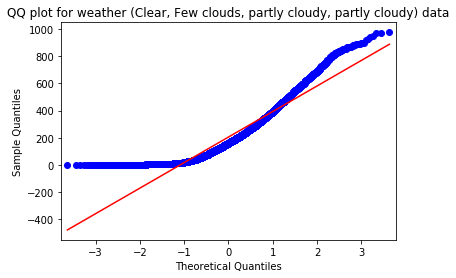

In [90]:
qqplot(weather_clear, line="s")
plt.title('QQ plot for weather (Clear, Few clouds, partly cloudy, partly cloudy) data')
plt.show()

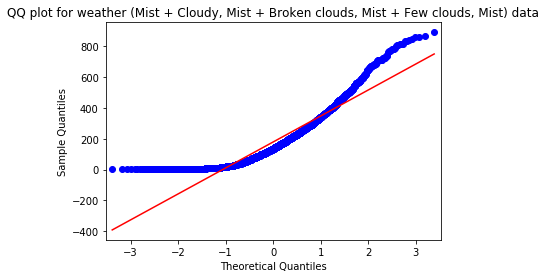

In [91]:
qqplot(weather_mist, line="s")
plt.title('QQ plot for weather (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) data')
plt.show()

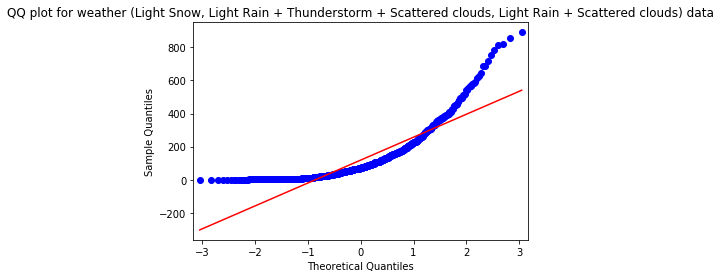

In [92]:
qqplot(weather_lightsnow, line="s")
plt.title('QQ plot for weather (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) data')
plt.show()

In [93]:
weather_heavyrain

5631    164
Name: count, dtype: int64

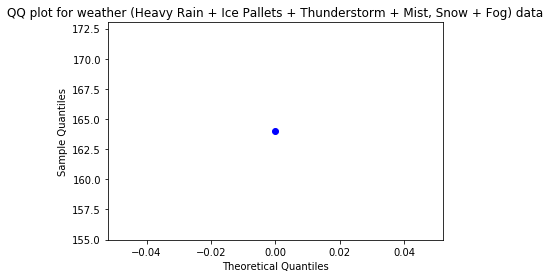

In [94]:
qqplot(weather_heavyrain, line="s")
plt.title('QQ plot for weather (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) data')
plt.show()

#### Observation

- QQ plot shows that, that season_winter, season_summer, season_fall, season_spring not following normal(gaussian) distribution.

- We have only one data point for weather type 4 types of weather ((Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)). so we cannot say data follows normal distribution

### Shapiro test to check wether data follows Normal distribution or not

In [95]:
weather_clear_subset = weather_clear.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis): Data is Gaussian
- Ha (Alternate Hypothesis): Data is not Gaussian

In [96]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05
test_stats, p_value = shapiro(weather_clear_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.9329192042350769
7.316213304875419e-05
reject H0
Data is not Gaussian


#### Observation:

- p_value is less than alpha, so rejecting null hypothesis. it means data is not gaussian

In [97]:
weather_mist_subset = weather_mist.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis): Data is Gaussian
- Ha (Alternate Hypothesis): Data is not Gaussian

In [98]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05 # significance level
test_stats, p_value = shapiro(weather_mist_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.8609281778335571
3.070877596655919e-08
reject H0
Data is not Gaussian


#### Observation:

- p_value is less than alpha, so rejecting null hypothesis. it means data is not gaussian

In [99]:
weather_lightsnow_subset = weather_lightsnow.sample(100) #shapiro test will works for 50 to 200 samples

- H0 (Null Hypothesis) - Data is Gaussian
- Ha (Alternate Hypothesis) - Data is not Gaussian

In [100]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
alpha = 0.05 # significance level
test_stats, p_value = shapiro(weather_lightsnow_subset)
print(test_stats)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('Data is not Gaussian')
else:
  print('Do not reject H0')
  print('Data is Gaussian')

0.814339816570282
6.995914958451976e-10
reject H0
Data is not Gaussian


#### Observation:

- p_value is less than alpha, so rejecting null hypothesis. it means data is not gaussian
- We have only one data point for weather type 4 types of weather ((Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)). so we cannot say data follows normal distribution

#### Conclusion:

- Both QQplot and Shapiro test proved that season_winter, season_summer, season_fall, season_spring not following normal(gaussian) distribution.

### Checking variance in each group is equal or not using LEVENE test

#### Observation

- H0 (Null Hypothesis): variances are equal
- Ha (Alternate Hypothesis) variances are not equal

In [101]:
# H0: variances are equal
# H1: variances are not equal
alpha = 0.05 # significance level
statistic, p_value = levene(weather_clear,weather_mist, weather_lightsnow, weather_heavyrain)
print(statistic)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('variances are not equal')
else:
  print('Do not reject H0')
  print('variances are equal')

54.85106195954556
3.504937946833238e-35
reject H0
variances are not equal


#### Observation:

- p_value is lessthan alpha, so rejecting null hypothesis. Variances of each group are not equal
- If assumptions of ANOVA fails, We can use kruskal test to Check if No. of cycles rented is similar or different in different seasons

### Kruskal Test

- H0 (Null Hypothesis) : No. of cycles rented is similar in all weather conditions
- H1 (Alternate Hypothesis) : No. of cycles rented is different in all weather conditions

In [102]:
# H0: No. of cycles rented is similar in all weather conditions
# H1: No. of cycles rented is different in all weather conditions

statistic, p_value = kruskal(weather_clear,weather_mist, weather_lightsnow, weather_heavyrain)
print(statistic)
print(p_value)
if p_value < alpha:
  print('reject H0')
  print('No. of cycles rented is different in all weather conditions')
else:
  print('Do not reject H0')
  print('No. of cycles rented is similar in all weather conditions')

205.00216514479087
3.501611300708679e-44
reject H0
No. of cycles rented is different in all weather conditions


#### Conclusion:

- p_value is lessthan alpha, so rejecting null hypothesis
- No. of cycles rented is different in all weather conditions

###  Insights and Recommendations

- No. of cycles rented is different in different weather conditions, More of rental registered in weather condition Clear, Few clouds, partly cloudy, partly cloudy. and only one data point for weather Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. So supply should be according to demand.

- Less rentals happend in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, in this situation we may transfer electric cycle to near by other states where weather conditions is better for rental

- No. of cycles rented is different in different seasons More of rental registered in fall season. and less in spring season. So supply should be according to demand.

- Less rentals happend in spring season, in this situation we may transfer electric cycle to near by other places where different season, which is better for rental

- Most of the rentals registered happened with registered people into the system, very less with casual people so we have to analyze causal rental register flow / data / reviews. why it is low. We may take recommended actions to increase rentals.

- As per data, working day and holiday is no effect on total no. of registered rental. So if we open rental stations near IT parks, places where more companies were there, and near metro rail statios so that employees may use rental cycles. count of rental may increases.

- Most of the rental happened with registered users. So most of the users are interested to come back and use shared electrical cycles again. we can analyze their most of the pickup and dropped locations and accordingly we can deploy shared electric cycles in that locations